### Stochastic Gradient Descent Method

Note how stochastic gradient descent differs, in that it's gradient descent is not the true gradient it is an estimate of the gradient from a sample of points

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', '.*A value is trying to be set on a copy of a slice from a DataFrame.*')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

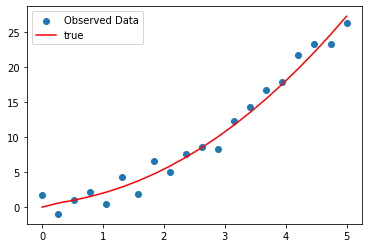

In [2]:
x_train=np.linspace(0,5,20)
def f(x):
    return x**2+np.sqrt(x)
y_train=f(x_train)+2*(-1+2*np.random.rand(20))

plt.scatter(x_train,y_train,label='Observed Data')
plt.plot(x_train,f(x_train),color='red',label='true')
plt.legend()

In [3]:
M = x_train[:, np.newaxis]**[0,1,2]
M

array([[ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.26315789,  0.06925208],
       [ 1.        ,  0.52631579,  0.27700831],
       [ 1.        ,  0.78947368,  0.6232687 ],
       [ 1.        ,  1.05263158,  1.10803324],
       [ 1.        ,  1.31578947,  1.73130194],
       [ 1.        ,  1.57894737,  2.49307479],
       [ 1.        ,  1.84210526,  3.3933518 ],
       [ 1.        ,  2.10526316,  4.43213296],
       [ 1.        ,  2.36842105,  5.60941828],
       [ 1.        ,  2.63157895,  6.92520776],
       [ 1.        ,  2.89473684,  8.37950139],
       [ 1.        ,  3.15789474,  9.97229917],
       [ 1.        ,  3.42105263, 11.70360111],
       [ 1.        ,  3.68421053, 13.5734072 ],
       [ 1.        ,  3.94736842, 15.58171745],
       [ 1.        ,  4.21052632, 17.72853186],
       [ 1.        ,  4.47368421, 20.01385042],
       [ 1.        ,  4.73684211, 22.43767313],
       [ 1.        ,  5.        , 25.        ]])

In [58]:
def stochastic_gradient_descent(x_train,y_train,learning_rate,max_iter=50000,tol=100):
    '''
    Given training data for feature matrix X and target vector y and a user-specified learning rate solve a least squares problem via stochastic gradient descent 
    
    Here the gradient formula is known analytically -> This makes no difference as TF has tensor differentiation support
    
    Instead we only compute the gradient on a subset of points configured by subset 
    
    '''
    w=np.random.rand(x_train.shape[1])
    index=np.arange(len(x_train))
    
    for j in range (0,max_iter):
        rng = np.random.default_rng(j)
        rng.shuffle(index)
        x_train=x_train[index]
        y_train=y_train[index]
        
        for count in range(1,len(x_train)):
            pred=np.dot(x_train,w)
            l1_error=(y_train.T-pred) # l1 error for predictions
            l2_error=l1_error**2 # l2 error for predictions 
            
            # Takes on a sample -> Iteratively sampling new points 
            gradient_scaler=(-2)*np.sum(l1_error[count].reshape(-1,1)*x_train[count],axis=0) # differential can be written as matric multiplication
           
            w=w-learning_rate*gradient_scaler
        
            
        if abs(np.sum(l2_error)) <tol:
            print("Min Tol Reached at ",j)
            return w,l2_error
        
    print("Max Iter reached")
    return w,l2_error

In [59]:
weights,error=stochastic_gradient_descent(M,y_train,0.001)
print("Weights Vector is", weights)
print("MSE is", np.sum(error))

Min Tol Reached at  0
Weights Vector is [0.5377388  0.69558504 0.95691854]
MSE is 36.58156816382545


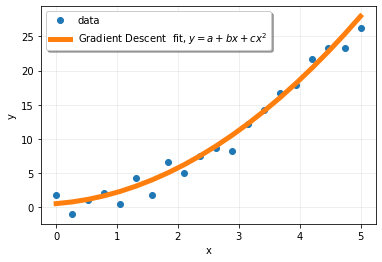

In [60]:
plt.plot(x_train, y_train, 'o', label='data')
xx = np.linspace(0, 5, 20)
yy = weights[0] +weights[1]*xx+weights[2]*xx**2
plt.plot(xx, yy, label='Gradient Descent  fit, $y = a+bx+cx^2$',lw=5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()

- Note the improvement of SGD, it was solved to the error threshold within the first sampling of points
- The reason this algorithm converges is the learning rate compounds , otherwise one could think of the soln as bouncing between gradients of individually sampled points